In [1]:
# ==============================================================================
# STEP 1: INSTALLING REQUIRED PACKAGES
# ==============================================================================

# Installing required packages
!pip install xgboost -q
!pip install supabase -q
!pip install streamlit -q
!pip install plotly -q
!pip install seaborn -q

print("✅ All packages installed successfully!")


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ All packages installed successfully!



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, classification_report, confusion_matrix, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
# ==============================================================================
# STEP 2: UPLOAD YOUR ZIPPED DATASETS FROM YOUR COMPUTER
# ==============================================================================

from google.colab import files
import zipfile
import os
import glob
import shutil

# Create datasets directory
DATASET_DIR = '/content/datasets'
os.makedirs(DATASET_DIR, exist_ok=True)
print("📁 Dataset directory created:", DATASET_DIR)

# Upload files from your computer
print("\n📤 Please upload your zipped dataset files...")
print("   Tip: You can select multiple files at once!")
print("   Hold Ctrl (Windows) or Cmd (Mac) to select multiple files")
print()
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Move uploaded files to datasets directory
print("\n📦 Moving files to datasets directory...")
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        source = f'/content/{filename}'
        destination = f'{DATASET_DIR}/{filename}'
        if os.path.exists(source):
            shutil.move(source, destination)
            print(f"   ✅ Moved: {filename}")

# List all zip files
zip_files = glob.glob(f'{DATASET_DIR}/*.zip')
print(f"\n📊 Found {len(zip_files)} zip files to extract")
print("\nZip files found:")
for zf in zip_files:
    print(f"   - {os.path.basename(zf)}")

# Extract ALL zip files
print("\n🔓 Extracting all zip files...")
extracted_count = 0
for zip_path in zip_files:
    try:
        zip_filename = os.path.basename(zip_path)
        print(f"\n📦 Extracting: {zip_filename}")

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(DATASET_DIR)
            file_list = zip_ref.namelist()
            extracted_count += len(file_list)
            print(f"   ✅ Extracted {len(file_list)} files")

    except Exception as e:
        print(f"   ⚠️ Error extracting {zip_filename}: {e}")

print("\n" + "="*60)
print(f"✅ EXTRACTION COMPLETE!")
print(f"Total files extracted: {extracted_count}")
print("="*60)


📦 Moving files to datasets directory...
   ✅ Moved: dataverse_files.zip
   ✅ Moved: KEN_RTFP_mkt_2007_2025-09-29.zip
   ✅ Moved: KEN_RTFP_mkt_2007_2025-10-13.zip
   ✅ Moved: KEN_RTP_details_2007_2025-09-29.zip
   ✅ Moved: KEN_RTP_details_2007_2025-10-13.zip
   ✅ Moved: KEN_RTP_ticker_info_2007_2025-09-29.zip
   ✅ Moved: KEN_RTP_ticker_info_2007_2025-10-13.zip

📊 Found 7 zip files to extract

Zip files found:
   - KEN_RTP_ticker_info_2007_2025-09-29.zip
   - KEN_RTP_details_2007_2025-10-13.zip
   - KEN_RTP_details_2007_2025-09-29.zip
   - dataverse_files.zip
   - KEN_RTFP_mkt_2007_2025-10-13.zip
   - KEN_RTFP_mkt_2007_2025-09-29.zip
   - KEN_RTP_ticker_info_2007_2025-10-13.zip

🔓 Extracting all zip files...

📦 Extracting: KEN_RTP_ticker_info_2007_2025-09-29.zip
   ✅ Extracted 1 files

📦 Extracting: KEN_RTP_details_2007_2025-10-13.zip
   ✅ Extracted 1 files

📦 Extracting: KEN_RTP_details_2007_2025-09-29.zip
   ✅ Extracted 1 files

📦 Extracting: dataverse_files.zip
   ✅ Extracted 3 files

In [ ]:
# Explore what was extracted
print("\n📊 Exploring extracted files...")
print("="*60)

# Find all extracted files
all_files = []
for root, dirs, files_list in os.walk(DATASET_DIR):
    for file in files_list:
        if not file.startswith('.'):
            file_path = os.path.join(root, file)
            all_files.append(file_path)

print(f"Total files extracted: {len(all_files)}")

# Find data files (CSV and Excel)
csv_files = glob.glob(f'{DATASET_DIR}/**/*.csv', recursive=True)
xlsx_files = glob.glob(f'{DATASET_DIR}/**/*.xlsx', recursive=True)
xls_files = glob.glob(f'{DATASET_DIR}/**/*.xls', recursive=True)

print(f"\n📊 Data files found:")
print(f"  📄 CSV files: {len(csv_files)}")
print(f"  📊 Excel files: {len(xlsx_files) + len(xls_files)}")

if csv_files:
    print("\n📄 CSV files list:")
    for i, f in enumerate(sorted(csv_files), 1):
        file_size = os.path.getsize(f) / 1024  # Size in KB
        print(f"   {i}. {os.path.basename(f)} ({file_size:.1f} KB)")

if xlsx_files or xls_files:
    print("\n📊 Excel files list:")
    for i, f in enumerate(sorted(xlsx_files + xls_files), 1):
        file_size = os.path.getsize(f) / 1024
        print(f"   {i}. {os.path.basename(f)} ({file_size:.1f} KB)")

print("\n✅ Files ready for loading!")


📊 Exploring extracted files...
Total files extracted: 15

📊 Data files found:
  📄 CSV files: 6
  📊 Excel files: 2

📄 CSV files list:
   1. KEN_RTFP_mkt_2007_2025-09-29.csv (15288.7 KB)
   2. KEN_RTFP_mkt_2007_2025-10-13.csv (15751.5 KB)
   3. KEN_RTP_details_2007_2025-09-29.csv (1.0 KB)
   4. KEN_RTP_details_2007_2025-10-13.csv (1.0 KB)
   5. KEN_RTP_ticker_info_2007_2025-09-29.csv (0.5 KB)
   6. KEN_RTP_ticker_info_2007_2025-10-13.csv (0.5 KB)

📊 Excel files list:
   1. FSS-KEN Results Overview.xlsx (4498.7 KB)
   2. FSS-KEN Tool.xlsx (35788.4 KB)

✅ Files ready for loading!


In [ ]:
# ==============================================================================
# STEP 3: LOAD AND EXPLORE YOUR DATASETS
# ==============================================================================

# Load and inspect CSV files
dataframes = {}

print("📊 Loading CSV files...")
print("="*60)

for csv_file in sorted(csv_files):
    try:
        print(f"\n📄 Loading: {os.path.basename(csv_file)}")

        # Load the CSV file
        df = pd.read_csv(csv_file)

        filename_base = os.path.basename(csv_file).replace('.csv', '')
        dataframes[filename_base] = df

        print(f"   ✅ Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
        print(f"   📋 Columns ({len(df.columns)}):")
        for col in df.columns:
            print(f"      - {col}")
        print(f"\n   First 3 rows:")
        print(df.head(3))

    except Exception as e:
        print(f"   ⚠️ Error loading: {e}")

📊 Loading CSV files...

📄 Loading: KEN_RTFP_mkt_2007_2025-09-29.csv
   ✅ Shape: 41,625 rows × 46 columns
   📋 Columns (46):
      - ISO3
      - country
      - adm1_name
      - adm2_name
      - mkt_name
      - lat
      - lon
      - geo_id
      - price_date
      - year
      - month
      - currency
      - components
      - start_dense_data
      - last_survey_point
      - data_coverage
      - data_coverage_recent
      - index_confidence_score
      - spatially_interpolated
      - beans
      - maize
      - potatoes
      - o_beans
      - h_beans
      - l_beans
      - c_beans
      - inflation_beans
      - trust_beans
      - o_maize
      - h_maize
      - l_maize
      - c_maize
      - inflation_maize
      - trust_maize
      - o_potatoes
      - h_potatoes
      - l_potatoes
      - c_potatoes
      - inflation_potatoes
      - trust_potatoes
      - o_food_price_index
      - h_food_price_index
      - l_food_price_index
      - c_food_price_index
      - inflat

In [ ]:
# Load and inspect Excel files
print("\n\n📊 Loading Excel files...")
print("="*60)

for excel_file in sorted(xlsx_files + xls_files):
    try:
        print(f"\n📄 Loading: {os.path.basename(excel_file)}")

        # Get sheet names
        xl_file = pd.ExcelFile(excel_file)
        print(f"   📑 Sheets available: {len(xl_file.sheet_names)}")

        # Load all sheets
        for sheet_name in xl_file.sheet_names:
            df = pd.read_excel(excel_file, sheet_name=sheet_name)
            filename_base = os.path.basename(excel_file).replace('.xlsx', '').replace('.xls', '')

            # Store with sheet name
            key_name = f"{filename_base}_{sheet_name}"
            dataframes[key_name] = df

            print(f"\n   📊 Sheet: '{sheet_name}'")
            print(f"      Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
            print(f"      Columns ({len(df.columns)}):")
            for col in df.columns[:5]:  # Show first 5 columns
                print(f"         - {col}")
            if len(df.columns) > 5:
                print(f"         ... and {len(df.columns) - 5} more")

            # Show sample data
            if not df.empty:
                print(f"\n      Sample data:")
                print(df.head(2))

    except Exception as e:
        print(f"   ⚠️ Error loading: {e}")



📊 Loading Excel files...

📄 Loading: FSS-KEN Results Overview.xlsx
   📑 Sheets available: 10

   📊 Sheet: 'User guide'
      Shape: 17 rows × 2 columns
      Columns (2):
         - Unnamed: 0
         - Unnamed: 1

      Sample data:
   Unnamed: 0 Unnamed: 1
0         NaN        NaN
1         NaN        NaN

   📊 Sheet: 'Tables'
      Shape: 29 rows × 17 columns
      Columns (17):
         - Unnamed: 0
         - Tables for both baseline values and percentages changes from the baseline of key poverty and diet quality indicators.
         - Unnamed: 2
         - Unnamed: 3
         - Unnamed: 4
         ... and 12 more

      Sample data:
   Unnamed: 0  \
0         NaN   
1         NaN   

  Tables for both baseline values and percentages changes from the baseline of key poverty and diet quality indicators.  \
0                                                NaN                                                                      
1                                                NaN

In [ ]:
# Identify your main datasets
print("\n\n📋 DATASET SUMMARY")
print("="*60)
print("\nYou have the following datasets loaded:\n")

for name, df in dataframes.items():
    print(f"📁 {name}")
    print(f"   Rows: {df.shape[0]:,}")
    print(f"   Columns: {df.shape[1]}")
    print(f"   Size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print()

# Most likely your main price dataset
print("="*60)
print("🔍 IDENTIFYING MAIN DATASETS:")
print("="*60)

# Look for the main World Bank price dataset (usually the largest CSV)
main_price_datasets = [df for name, df in dataframes.items()
                       if 'RTFP_mkt' in name and df.shape[0] > 10000]

if main_price_datasets:
    largest_df = max(main_price_datasets, key=lambda x: x.shape[0])
    largest_name = [name for name, df in dataframes.items() if df is largest_df][0]
    print(f"\n✅ MAIN PRICE DATASET IDENTIFIED:")
    print(f"   Name: {largest_name}")
    print(f"   Shape: {largest_df.shape[0]:,} rows × {largest_df.shape[1]} columns")

    # Set as your main dataset
    main_price_data = largest_df
    print(f"\n✅ This will be your main price data for analysis")
else:
    print("⚠️ Could not identify main price dataset")

# Look for FSS-KEN household data
fss_datasets = [name for name in dataframes.keys() if 'FSS-KEN' in name or 'fss' in name.lower()]
if fss_datasets:
    print(f"\n✅ FSS-KEN HOUSEHOLD DATA IDENTIFIED:")
    for ds in fss_datasets:
        print(f"   - {ds}")



📋 DATASET SUMMARY

You have the following datasets loaded:

📁 KEN_RTFP_mkt_2007_2025-09-29
   Rows: 41,625
   Columns: 46
   Size: 39.90 MB

📁 KEN_RTFP_mkt_2007_2025-10-13
   Rows: 42,262
   Columns: 46
   Size: 40.74 MB

📁 KEN_RTP_details_2007_2025-09-29
   Rows: 1
   Columns: 23
   Size: 0.00 MB

📁 KEN_RTP_details_2007_2025-10-13
   Rows: 1
   Columns: 23
   Size: 0.00 MB

📁 KEN_RTP_ticker_info_2007_2025-09-29
   Rows: 5
   Columns: 8
   Size: 0.00 MB

📁 KEN_RTP_ticker_info_2007_2025-10-13
   Rows: 5
   Columns: 8
   Size: 0.00 MB

📁 FSS-KEN Results Overview_User guide
   Rows: 17
   Columns: 2
   Size: 0.00 MB

📁 FSS-KEN Results Overview_Tables
   Rows: 29
   Columns: 17
   Size: 0.01 MB

📁 FSS-KEN Results Overview_Consumption gap graphs
   Rows: 2
   Columns: 2
   Size: 0.00 MB

📁 FSS-KEN Results Overview_Consumption gap charts
   Rows: 1
   Columns: 2
   Size: 0.00 MB

📁 FSS-KEN Results Overview_Poverty graphs
   Rows: 2
   Columns: 2
   Size: 0.00 MB

📁 FSS-KEN Results Overview

In [ ]:
# Show all available datasets
print("\n📊 ALL AVAILABLE DATASETS:")
print("="*60)
for i, (name, df) in enumerate(dataframes.items(), 1):
    print(f"\n{i}. {name}")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)[:5]}..." if len(df.columns) > 5 else f"   Columns: {list(df.columns)}")


📊 ALL AVAILABLE DATASETS:

1. KEN_RTFP_mkt_2007_2025-09-29
   Shape: (41625, 46)
   Columns: ['ISO3', 'country', 'adm1_name', 'adm2_name', 'mkt_name']...

2. KEN_RTFP_mkt_2007_2025-10-13
   Shape: (42262, 46)
   Columns: ['ISO3', 'country', 'adm1_name', 'adm2_name', 'mkt_name']...

3. KEN_RTP_details_2007_2025-09-29
   Shape: (1, 23)
   Columns: ['country', 'iso3', 'components', 'currency', 'start_date_observations']...

4. KEN_RTP_details_2007_2025-10-13
   Shape: (1, 23)
   Columns: ['country', 'iso3', 'components', 'currency', 'start_date_observations']...

5. KEN_RTP_ticker_info_2007_2025-09-29
   Shape: (5, 8)
   Columns: ['iso3', 'country', 'ticker', 'full_name', 'units']...

6. KEN_RTP_ticker_info_2007_2025-10-13
   Shape: (5, 8)
   Columns: ['iso3', 'country', 'ticker', 'full_name', 'units']...

7. FSS-KEN Results Overview_User guide
   Shape: (17, 2)
   Columns: ['Unnamed: 0', 'Unnamed: 1']

8. FSS-KEN Results Overview_Tables
   Shape: (29, 17)
   Columns: ['Unnamed: 0', 'Tab

In [ ]:
# ==============================================================================
# STEP 4A: DETECT AND CONFIRM KEY COLUMNS
# ==============================================================================

import numpy as np

df = main_price_data  # from earlier step

print("Columns in main price dataset:")
print(list(df.columns))

# Helper: find candidate columns by name pattern
def find_candidates(columns, needles):
    cols = [c for c in columns if any(n in c.lower() for n in needles)]
    # Keep order stable but unique
    seen = set()
    result = []
    for c in cols:
        if c not in seen:
            result.append(c); seen.add(c)
    return result

cols = list(df.columns)

date_candidates = find_candidates(cols, ["date", "month", "period", "time"])
price_candidates = find_candidates(cols, ["price", "value", "amount", "usd"])
commodity_candidates = find_candidates(cols, ["product", "commodity", "item", "ticker", "name"])
market_candidates = find_candidates(cols, ["mkt", "market", "adm1", "adm2", "location", "region", "city", "county"])

# Also filter to numeric for price
numeric_cols = [c for c in cols if np.issubdtype(df[c].dtype, np.number)]
price_candidates_numeric = [c for c in price_candidates if c in numeric_cols] or numeric_cols

print("\nDetected candidates:")
print("- Date candidates:", date_candidates[:8])
print("- Price candidates (numeric-first):", price_candidates_numeric[:8])
print("- Commodity candidates:", commodity_candidates[:8])
print("- Market candidates:", market_candidates[:8])

# Heuristics for default picks
def pick_first(cands, preferred):
    for p in preferred:
        for c in cands:
            if c.lower() == p:
                return c
    return cands[0] if cands else None

date_col = pick_first(date_candidates, ["date", "obs_date"])
price_col = pick_first(price_candidates_numeric, ["price", "usdprice"])
commodity_col = pick_first(commodity_candidates, ["commodity", "product", "item", "ticker"])
market_col = pick_first(market_candidates, ["mkt_name", "market", "adm2_name", "adm1_name"])

print("\nProposed mapping:")
print(f"- date_col      = {date_col}")
print(f"- price_col     = {price_col}")
print(f"- commodity_col = {commodity_col}")
print(f"- market_col    = {market_col}")

# If any is None, print a heads-up
if not all([date_col, price_col, commodity_col, market_col]):
    print("\n⚠️ One or more key columns were not auto-detected. Tell me the correct names.")

Columns in main price dataset:
['ISO3', 'country', 'adm1_name', 'adm2_name', 'mkt_name', 'lat', 'lon', 'geo_id', 'price_date', 'year', 'month', 'currency', 'components', 'start_dense_data', 'last_survey_point', 'data_coverage', 'data_coverage_recent', 'index_confidence_score', 'spatially_interpolated', 'maize', 'potatoes', 'sorghum', 'o_maize', 'h_maize', 'l_maize', 'c_maize', 'inflation_maize', 'trust_maize', 'o_potatoes', 'h_potatoes', 'l_potatoes', 'c_potatoes', 'inflation_potatoes', 'trust_potatoes', 'o_sorghum', 'h_sorghum', 'l_sorghum', 'c_sorghum', 'inflation_sorghum', 'trust_sorghum', 'o_food_price_index', 'h_food_price_index', 'l_food_price_index', 'c_food_price_index', 'inflation_food_price_index', 'trust_food_price_index']

Detected candidates:
- Date candidates: ['price_date', 'month']
- Price candidates (numeric-first): ['o_food_price_index', 'h_food_price_index', 'l_food_price_index', 'c_food_price_index', 'inflation_food_price_index', 'trust_food_price_index']
- Commodit

In [ ]:
# ==============================================================================
# STEP 4B: CLEAN, AGGREGATE MONTHLY, AND LABEL VOLATILITY
# ==============================================================================

# If you overrode, set here:
# date_col = "..."
# price_col = "..."
# commodity_col = "..."
# market_col = "..."

df = main_price_data.copy()

# Parse dates
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
before = len(df)
df = df.dropna(subset=[date_col, price_col])
print(f"✅ Dropped {before - len(df)} rows with missing {date_col}/{price_col}")

# Keep only relevant columns for pipeline
keep_cols = [date_col, price_col, commodity_col, market_col]
keep_cols = [c for c in keep_cols if c in df.columns]
df = df[keep_cols].copy()

# Ensure numeric price
df[price_col] = pd.to_numeric(df[price_col], errors="coerce")
before = len(df)
df = df.dropna(subset=[price_col])
print(f"✅ Dropped {before - len(df)} rows with non-numeric {price_col}")

# Normalize to month-start for monthly aggregation
df["year_month"] = df[date_col].dt.to_period("M").dt.to_timestamp()

# Cap extreme outliers per commodity+market (3-sigma)
outliers_capped = 0
for (comm, mkt), grp in df.groupby([commodity_col, market_col]):
    mean_val = grp[price_col].mean()
    std_val = grp[price_col].std()
    if pd.isna(std_val) or std_val == 0:
        continue
    upper = mean_val + 3 * std_val
    lower = mean_val - 3 * std_val
    mask = (df[commodity_col] == comm) & (df[market_col] == mkt)
    before_upper = (df.loc[mask, price_col] > upper).sum()
    before_lower = (df.loc[mask, price_col] < lower).sum()
    outliers_capped += (before_upper + before_lower)
    df.loc[mask & (df[price_col] > upper), price_col] = upper
    df.loc[mask & (df[price_col] < lower), price_col] = lower

print(f"✅ Capped {outliers_capped} extreme price outliers")

# Monthly aggregation by commodity + market
agg = (df
       .groupby([commodity_col, market_col, "year_month"])
       .agg(
           avg_price=(price_col, "mean"),
           price_std=(price_col, "std"),
           min_price=(price_col, "min"),
           max_price=(price_col, "max"),
           obs_count=(price_col, "count"),
       )
       .reset_index()
)

# Fill NaN std with 0
agg["price_std"] = agg["price_std"].fillna(0.0)
agg["price_cv"] = agg["price_std"] / agg["avg_price"].replace(0, np.nan)

# Sort and compute monthly pct_change within commodity+market
agg = agg.sort_values([commodity_col, market_col, "year_month"])
agg["monthly_price_change"] = (
    agg.groupby([commodity_col, market_col])["avg_price"].pct_change()
)

# Volatility labels
def categorize_volatility(change):
    if pd.isna(change):
        return "Unknown"
    c = abs(change)
    if c <= 0.05:    # <= 5%
        return "Low"
    elif c <= 0.15:  # 5-15%
        return "Medium"
    elif c <= 0.30:  # 15-30%
        return "High"
    else:            # > 30%
        return "Extreme"

agg["volatility_class"] = agg["monthly_price_change"].apply(categorize_volatility)

print("\n✅ Aggregation complete. Preview:")
print(agg.head(10))

print("\n📊 Volatility class distribution:")
print(agg["volatility_class"].value_counts(dropna=False))

✅ Dropped 0 rows with missing price_date/o_food_price_index
✅ Dropped 0 rows with non-numeric o_food_price_index
✅ Capped 0 extreme price outliers

✅ Aggregation complete. Preview:
  adm1_name          mkt_name year_month  avg_price  price_std  min_price  \
0   Central  Karatina (Nyeri) 2007-01-01       0.47        0.0       0.47   
1   Central  Karatina (Nyeri) 2007-02-01       0.47        0.0       0.47   
2   Central  Karatina (Nyeri) 2007-03-01       0.47        0.0       0.47   
3   Central  Karatina (Nyeri) 2007-04-01       0.48        0.0       0.48   
4   Central  Karatina (Nyeri) 2007-05-01       0.48        0.0       0.48   
5   Central  Karatina (Nyeri) 2007-06-01       0.48        0.0       0.48   
6   Central  Karatina (Nyeri) 2007-07-01       0.48        0.0       0.48   
7   Central  Karatina (Nyeri) 2007-08-01       0.48        0.0       0.48   
8   Central  Karatina (Nyeri) 2007-09-01       0.48        0.0       0.48   
9   Central  Karatina (Nyeri) 2007-10-01       0.

In [ ]:
# ==============================================================================
# STEP 4 CORRECTED: RESTRUCTURE DATA TO USE ACTUAL COMMODITY PRICES
# ==============================================================================

print("📊 Restructuring data to use actual commodity prices...")

# Load the original data again
df = dataframes['KEN_RTFP_mkt_2007_2025-10-13'].copy()

print(f"Original shape: {df.shape}")

# Convert date column
df['price_date'] = pd.to_datetime(df['price_date'], errors='coerce')

# Identify commodity price columns
# You have: maize, potatoes, sorghum (and these have o_*, h_*, l_*, c_* variants)
# Let's use the 'c_*' columns which likely means "current" price
price_columns = [col for col in df.columns if col in ['maize', 'potatoes', 'sorghum']]
print(f"\n📍 Found commodity price columns: {price_columns}")

# Melt the data to create one row per commodity
# We'll use maize, potatoes, sorghum as our commodities
df_melted = []

for commodity in ['maize', 'potatoes', 'sorghum']:
    if commodity in df.columns:
        print(f"\n📦 Processing: {commodity}")

        # Create a subset for this commodity
        df_comm = df[['price_date', 'mkt_name', 'adm1_name', 'adm2_name', commodity]].copy()
        df_comm['commodity'] = commodity
        df_comm = df_comm.rename(columns={commodity: 'price'})

        # Check for valid data
        df_comm = df_comm[df_comm['price'].notna()]
        print(f"   ✅ {len(df_comm)} rows with {commodity} prices")

        df_melted.append(df_comm)

# Combine all commodities
df_combined = pd.concat(df_melted, ignore_index=True)
print(f"\n✅ Combined shape: {df_combined.shape}")
print(f"   Total rows: {len(df_combined):,}")

# Remove rows with missing prices
before = len(df_combined)
df_combined = df_combined.dropna(subset=['price_date', 'price', 'commodity'])
print(f"✅ Dropped {before - len(df_combined)} rows with missing data")

# Ensure price is numeric
df_combined['price'] = pd.to_numeric(df_combined['price'], errors='coerce')
before = len(df_combined)
df_combined = df_combined.dropna(subset=['price'])
print(f"✅ Dropped {before - len(df_combined)} rows with non-numeric prices")

print(f"\n✅ Final dataset ready: {df_combined.shape}")

📊 Restructuring data to use actual commodity prices...
Original shape: (42262, 46)

📍 Found commodity price columns: ['maize', 'potatoes', 'sorghum']

📦 Processing: maize
   ✅ 1004 rows with maize prices

📦 Processing: potatoes
   ✅ 670 rows with potatoes prices

📦 Processing: sorghum
   ✅ 672 rows with sorghum prices

✅ Combined shape: (2346, 6)
   Total rows: 2,346
✅ Dropped 0 rows with missing data
✅ Dropped 0 rows with non-numeric prices

✅ Final dataset ready: (2346, 6)


In [ ]:
# Create monthly aggregated data
print("\n📊 Creating monthly aggregated data...")

# Create year-month grouping
df_combined['year_month'] = df_combined['price_date'].dt.to_period('M').dt.to_timestamp()

# Remove outliers per commodity and market (using 3 standard deviations)
print("Removing outliers...")
outliers_capped = 0
for (comm, mkt), group in df_combined.groupby(['commodity', 'mkt_name']):
    mean_price = group['price'].mean()
    std_price = group['price'].std()

    if pd.isna(std_price) or std_price == 0:
        continue

    upper_bound = mean_price + 3 * std_price
    lower_bound = mean_price - 3 * std_price

    mask = (df_combined['commodity'] == comm) & (df_combined['mkt_name'] == mkt)
    outliers = ((df_combined.loc[mask, 'price'] > upper_bound) |
                (df_combined.loc[mask, 'price'] < lower_bound)).sum()
    outliers_capped += outliers

    # Cap outliers
    df_combined.loc[mask & (df_combined['price'] > upper_bound), 'price'] = upper_bound
    df_combined.loc[mask & (df_combined['price'] < lower_bound), 'price'] = lower_bound

print(f"✅ Capped {outliers_capped} extreme outliers")

# Aggregate by commodity, market, and month
print("\n📊 Aggregating by commodity, market, and month...")
monthly_data = df_combined.groupby(['commodity', 'mkt_name', 'adm1_name', 'year_month']).agg({
    'price': ['mean', 'std', 'min', 'max', 'count'],
    'price_date': 'min'  # Keep the date for reference
}).reset_index()

# Flatten column names
monthly_data.columns = ['commodity', 'mkt_name', 'adm1_name', 'year_month',
                        'avg_price', 'price_std', 'min_price', 'max_price',
                        'obs_count', 'date']

# Fill NaN standard deviations with 0
monthly_data['price_std'] = monthly_data['price_std'].fillna(0)

# Calculate coefficient of variation
monthly_data['price_cv'] = monthly_data['price_std'] / monthly_data['avg_price'].replace(0, np.nan)

# Sort by commodity, market, and date
monthly_data = monthly_data.sort_values(['commodity', 'mkt_name', 'year_month'])

# Calculate monthly price changes
monthly_data['monthly_price_change'] = monthly_data.groupby(['commodity', 'mkt_name'])['avg_price'].pct_change()

# Create volatility labels
def categorize_volatility(change):
    if pd.isna(change):
        return 'Unknown'
    abs_change = abs(change)
    if abs_change <= 0.05:
        return 'Low'
    elif abs_change <= 0.15:
        return 'Medium'
    elif abs_change <= 0.30:
        return 'High'
    else:
        return 'Extreme'

monthly_data['volatility_class'] = monthly_data['monthly_price_change'].apply(categorize_volatility)

print("✅ Monthly aggregation complete!")
print(f"\nDataset shape: {monthly_data.shape}")
print(f"\nFirst 10 rows:")
print(monthly_data.head(10))

print("\n📊 Volatility class distribution:")
print(monthly_data['volatility_class'].value_counts())

print("\n📊 Commodity distribution:")
print(monthly_data['commodity'].value_counts())

print("\n📊 Market distribution (top 10):")
print(monthly_data['mkt_name'].value_counts().head(10))


📊 Creating monthly aggregated data...
Removing outliers...
✅ Capped 10 extreme outliers

📊 Aggregating by commodity, market, and month...
✅ Monthly aggregation complete!

Dataset shape: (2278, 13)

First 10 rows:
  commodity mkt_name      adm1_name year_month  avg_price  price_std  \
0     maize  Garissa  North Eastern 2015-01-01       65.0        0.0   
1     maize  Garissa  North Eastern 2015-02-01       65.0        0.0   
2     maize  Garissa  North Eastern 2015-03-01       65.0        0.0   
3     maize  Garissa  North Eastern 2015-04-01       65.0        0.0   
4     maize  Garissa  North Eastern 2015-05-01       60.0        0.0   
5     maize  Garissa  North Eastern 2015-06-01       50.0        0.0   
6     maize  Garissa  North Eastern 2015-07-01       50.0        0.0   
7     maize  Garissa  North Eastern 2015-08-01       50.0        0.0   
8     maize  Garissa  North Eastern 2015-09-01       50.0        0.0   
9     maize  Garissa  North Eastern 2015-10-01       50.0        0

In [ ]:
# Display summary information
print("📊 FINAL DATASET SUMMARY")
print("=" * 60)
print(f"\nTotal records: {len(monthly_data):,}")
print(f"Date range: {monthly_data['year_month'].min()} to {monthly_data['year_month'].max()}")
print(f"\nCommodities: {monthly_data['commodity'].unique()}")
print(f"\nMarkets: {monthly_data['mkt_name'].nunique()} unique markets")
print(f"Administrative regions: {monthly_data['adm1_name'].unique()}")

print("\n📊 Volatility Distribution:")
vol_dist = monthly_data['volatility_class'].value_counts()
for vol_type, count in vol_dist.items():
    percentage = (count / len(monthly_data)) * 100
    print(f"   {vol_type:8s}: {count:6,} ({percentage:5.2f}%)")

# Set this as your main dataset for further analysis
main_price_data = monthly_data

print("\n✅ Dataset ready for feature engineering!")

📊 FINAL DATASET SUMMARY

Total records: 2,278
Date range: 2007-01-01 00:00:00 to 2020-12-01 00:00:00

Commodities: ['maize' 'potatoes' 'sorghum']

Markets: 13 unique markets
Administrative regions: ['North Eastern' 'Rift Valley' 'Coast' 'Eastern' 'Nyanza' 'Nairobi']

📊 Volatility Distribution:
   Low     :  1,107 (48.60%)
   Medium  :    690 (30.29%)
   High    :    316 (13.87%)
   Extreme :    145 ( 6.37%)
   Unknown :     20 ( 0.88%)

✅ Dataset ready for feature engineering!


In [ ]:
# ==============================================================================
# STEP 5: FEATURE ENGINEERING
# ==============================================================================

print("🔧 Creating features for classification...")
print("="*60)

# Start with your monthly data
df_features = monthly_data.copy().sort_values(['commodity', 'mkt_name', 'year_month'])

# Reset index
df_features = df_features.reset_index(drop=True)

print(f"Starting with {len(df_features)} records")

# 1. Lagged price changes (1, 3, 6, 12 months ago)
print("\n1️⃣ Creating lagged price changes...")
for lag in [1, 3, 6, 12]:
    df_features[f'price_change_{lag}m'] = df_features.groupby(['commodity', 'mkt_name'])['avg_price'].pct_change(lag)
    print(f"   ✅ Created {lag}-month price change feature")

# 2. Rolling volatility measures
print("\n2️⃣ Creating rolling volatility measures...")
for window in [3, 6, 12]:
    df_features[f'rolling_volatility_{window}m'] = (
        df_features.groupby(['commodity', 'mkt_name'])['avg_price']
        .rolling(window, min_periods=1)
        .std()
        .reset_index(drop=True)
    )

    df_features[f'rolling_cv_{window}m'] = (
        df_features.groupby(['commodity', 'mkt_name'])['avg_price']
        .rolling(window, min_periods=1)
        .apply(lambda x: x.std() / x.mean() if x.mean() != 0 else 0, raw=False)
        .reset_index(drop=True)
    )

    print(f"   ✅ Created {window}-month rolling volatility features")

# 3. Seasonal features
print("\n3️⃣ Creating seasonal features...")
df_features['month'] = df_features['year_month'].dt.month
df_features['quarter'] = df_features['year_month'].dt.quarter
df_features['year'] = df_features['year_month'].dt.year

print("   ✅ Created month, quarter, and year features")

# 4. Price momentum indicators
print("\n4️⃣ Creating price momentum indicators...")
# 3-month momentum
df_features['price_momentum_3m'] = (
    df_features.groupby(['commodity', 'mkt_name'])['avg_price']
    .rolling(3, min_periods=1)
    .apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] if len(x) >= 2 else 0)
    .reset_index(drop=True)
)

print("   ✅ Created 3-month price momentum")

# 5. Price range relative to average
df_features['price_range_rel'] = (
    (df_features['max_price'] - df_features['min_price']) /
    df_features['avg_price'].replace(0, np.nan)
)

print("   ✅ Created relative price range feature")

# 6. Year-over-year change
print("\n5️⃣ Creating year-over-year features...")
df_features['price_yoy_change'] = df_features.groupby(['commodity', 'mkt_name'])['avg_price'].pct_change(12)
print("   ✅ Created year-over-year price change")

print("\n✅ Feature engineering complete!")
print(f"Final dataset shape: {df_features.shape}")

🔧 Creating features for classification...
Starting with 2278 records

1️⃣ Creating lagged price changes...
   ✅ Created 1-month price change feature
   ✅ Created 3-month price change feature
   ✅ Created 6-month price change feature
   ✅ Created 12-month price change feature

2️⃣ Creating rolling volatility measures...
   ✅ Created 3-month rolling volatility features
   ✅ Created 6-month rolling volatility features
   ✅ Created 12-month rolling volatility features

3️⃣ Creating seasonal features...
   ✅ Created month, quarter, and year features

4️⃣ Creating price momentum indicators...
   ✅ Created 3-month price momentum
   ✅ Created relative price range feature

5️⃣ Creating year-over-year features...
   ✅ Created year-over-year price change

✅ Feature engineering complete!
Final dataset shape: (2278, 29)


In [ ]:
# Add market-level features
print("\n6️⃣ Adding market-level features...")

# Market encoding (you can use categorical encoding)
df_features['mkt_name_encoded'] = LabelEncoder().fit_transform(df_features['mkt_name'])
df_features['commodity_encoded'] = LabelEncoder().fit_transform(df_features['commodity'])
df_features['adm1_encoded'] = LabelEncoder().fit_transform(df_features['adm1_name'])

print("   ✅ Created categorical encodings for market, commodity, and region")

# Number of observations (could indicate data quality)
print("   ✅ Observation count already available as feature")

print(f"\nFinal feature count: {df_features.shape[1]} columns")


6️⃣ Adding market-level features...
   ✅ Created categorical encodings for market, commodity, and region
   ✅ Observation count already available as feature

Final feature count: 32 columns


In [ ]:
# Display the features created
print("\n📊 FEATURE ENGINEERING RESULTS")
print("="*60)

print(f"\nTotal features: {df_features.shape[1]}")
print(f"Total records: {len(df_features):,}")

# List all feature columns
feature_cols = [col for col in df_features.columns
                if col not in ['commodity', 'mkt_name', 'adm1_name', 'year_month', 'date', 'volatility_class']]

print(f"\nGenerated features ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    missing = df_features[col].isna().sum()
    missing_pct = (missing / len(df_features)) * 100
    print(f"   {i:2d}. {col:30s} (missing: {missing_pct:5.2f}%)")

# Show sample data
print("\n📋 Sample of engineered features:")
print(df_features[['commodity', 'mkt_name', 'year_month', 'avg_price', 'volatility_class'] +
      feature_cols[:5]].head(10))


📊 FEATURE ENGINEERING RESULTS

Total features: 32
Total records: 2,278

Generated features (26):
    1. avg_price                      (missing:  0.00%)
    2. price_std                      (missing:  0.00%)
    3. min_price                      (missing:  0.00%)
    4. max_price                      (missing:  0.00%)
    5. obs_count                      (missing:  0.00%)
    6. price_cv                       (missing:  0.00%)
    7. monthly_price_change           (missing:  0.88%)
    8. price_change_1m                (missing:  0.88%)
    9. price_change_3m                (missing:  2.63%)
   10. price_change_6m                (missing:  5.00%)
   11. price_change_12m               (missing:  9.75%)
   12. rolling_volatility_3m          (missing:  0.88%)
   13. rolling_cv_3m                  (missing:  0.88%)
   14. rolling_volatility_6m          (missing:  0.88%)
   15. rolling_cv_6m                  (missing:  0.88%)
   16. rolling_volatility_12m         (missing:  0.88%)
   17.

In [ ]:
# Prepare features for ML
print("\n🔄 Preparing data for machine learning...")

# Select features for classification
feature_columns = [
    'monthly_price_change', 'price_change_1m', 'price_change_3m',
    'price_change_6m', 'price_change_12m', 'price_yoy_change',
    'rolling_volatility_3m', 'rolling_volatility_6m', 'rolling_volatility_12m',
    'rolling_cv_3m', 'rolling_cv_6m', 'rolling_cv_12m',
    'price_momentum_3m', 'price_range_rel',
    'month', 'quarter', 'year',
    'commodity_encoded', 'mkt_name_encoded', 'adm1_encoded',
    'obs_count'
]

# Filter to only features that exist
available_features = [col for col in feature_columns if col in df_features.columns]
print(f"Using {len(available_features)} features:")

# Create feature matrix X
X = df_features[available_features].copy()

# Handle missing values by filling with median
print("\nHandling missing values...")
for col in X.columns:
    missing_count = X[col].isna().sum()
    if missing_count > 0:
        X[col] = X[col].fillna(X[col].median())
        print(f"   ✅ {col}: filled {missing_count} missing values with median")

# Create target variable y
y = df_features['volatility_class'].copy()

# Remove 'Unknown' class
before = len(X)
mask = y != 'Unknown'
X = X[mask].reset_index(drop=True)
y = y[mask].reset_index(drop=True)
removed = before - len(X)

if removed > 0:
    print(f"\n⚠️ Removed {removed} rows with 'Unknown' volatility class")

print(f"\n✅ Final dataset ready for ML:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"\n   Class distribution:")
print(y.value_counts())
print(f"\n   Features used:")
for i, feat in enumerate(available_features, 1):
    print(f"      {i:2d}. {feat}")


🔄 Preparing data for machine learning...
Using 21 features:

Handling missing values...
   ✅ monthly_price_change: filled 20 missing values with median
   ✅ price_change_1m: filled 20 missing values with median
   ✅ price_change_3m: filled 60 missing values with median
   ✅ price_change_6m: filled 114 missing values with median
   ✅ price_change_12m: filled 222 missing values with median
   ✅ price_yoy_change: filled 222 missing values with median
   ✅ rolling_volatility_3m: filled 20 missing values with median
   ✅ rolling_volatility_6m: filled 20 missing values with median
   ✅ rolling_volatility_12m: filled 20 missing values with median
   ✅ rolling_cv_3m: filled 20 missing values with median
   ✅ rolling_cv_6m: filled 20 missing values with median
   ✅ rolling_cv_12m: filled 20 missing values with median

⚠️ Removed 20 rows with 'Unknown' volatility class

✅ Final dataset ready for ML:
   Features (X): (2258, 21)
   Target (y): (2258,)

   Class distribution:
volatility_class
Low 

In [ ]:
# ==============================================================================
# STEP 6: SPLIT DATA AND TRAIN CLASSIFICATION MODELS
# ==============================================================================

print("✂️ Splitting data into training and testing sets...")
print("="*60)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensure each class is proportionally represented
)

print(f"✅ Data split completed:")
print(f"   Training set: {X_train.shape[0]:,} samples")
print(f"   Testing set: {X_test.shape[0]:,} samples")
print(f"   Features: {X_train.shape[1]}")

print("\n📊 Training set class distribution:")
print(y_train.value_counts())

print("\n📊 Testing set class distribution:")
print(y_test.value_counts())

✂️ Splitting data into training and testing sets...
✅ Data split completed:
   Training set: 1,806 samples
   Testing set: 452 samples
   Features: 21

📊 Training set class distribution:
volatility_class
Low        885
Medium     552
High       253
Extreme    116
Name: count, dtype: int64

📊 Testing set class distribution:
volatility_class
Low        222
Medium     138
High        63
Extreme     29
Name: count, dtype: int64


In [ ]:
# ==============================================================================
# TRAIN ALL 6 CLASSIFICATION MODELS
# ==============================================================================

print("🤖 Training all classification models...")
print("="*60)

models_trained = {}
predictions = {}
results = []

# ===== MODEL 1: Logistic Regression =====
print("\n1️⃣ Logistic Regression...")
scaler_lr = StandardScaler()
X_train_lr = scaler_lr.fit_transform(X_train)
X_test_lr = scaler_lr.transform(X_test)

lr_model = LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr')
lr_model.fit(X_train_lr, y_train)
models_trained['Logistic Regression'] = lr_model

y_pred_lr = lr_model.predict(X_test_lr)
predictions['Logistic Regression'] = y_pred_lr

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
results.append({'Model': 'Logistic Regression', 'Accuracy': accuracy_lr, 'F1-Score': f1_lr})
print(f"   ✅ Accuracy: {accuracy_lr:.4f}, F1: {f1_lr:.4f}")

# ===== MODEL 2: Decision Tree =====
print("\n2️⃣ Decision Tree...")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=10)
dt_model.fit(X_train, y_train)
models_trained['Decision Tree'] = dt_model

y_pred_dt = dt_model.predict(X_test)
predictions['Decision Tree'] = y_pred_dt

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
results.append({'Model': 'Decision Tree', 'Accuracy': accuracy_dt, 'F1-Score': f1_dt})
print(f"   ✅ Accuracy: {accuracy_dt:.4f}, F1: {f1_dt:.4f}")

dt_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

# ===== MODEL 3: Random Forest =====
print("\n3️⃣ Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15, min_samples_split=10, min_samples_leaf=5, n_jobs=-1)
rf_model.fit(X_train, y_train)
models_trained['Random Forest'] = rf_model

y_pred_rf = rf_model.predict(X_test)
predictions['Random Forest'] = y_pred_rf

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
results.append({'Model': 'Random Forest', 'Accuracy': accuracy_rf, 'F1-Score': f1_rf})
print(f"   ✅ Accuracy: {accuracy_rf:.4f}, F1: {f1_rf:.4f}")

rf_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# ===== MODEL 4: SVM =====
print("\n4️⃣ SVM (this may take a moment)...")
scaler_svm = StandardScaler()
X_train_svm = scaler_svm.fit_transform(X_train)
X_test_svm = scaler_svm.transform(X_test)

svm_model = SVC(kernel='rbf', random_state=42, probability=True, C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train)
models_trained['SVM'] = svm_model

y_pred_svm = svm_model.predict(X_test_svm)
predictions['SVM'] = y_pred_svm

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
results.append({'Model': 'SVM', 'Accuracy': accuracy_svm, 'F1-Score': f1_svm})
print(f"   ✅ Accuracy: {accuracy_svm:.4f}, F1: {f1_svm:.4f}")

# ===== MODEL 5: XGBoost =====
print("\n5️⃣ XGBoost...")
le_xgb = LabelEncoder()
y_train_encoded = le_xgb.fit_transform(y_train)
y_test_encoded = le_xgb.transform(y_test)

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)
models_trained['XGBoost'] = xgb_model

y_pred_encoded = xgb_model.predict(X_test)
y_pred_xgb = le_xgb.inverse_transform(y_pred_encoded)
predictions['XGBoost'] = y_pred_xgb

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
results.append({'Model': 'XGBoost', 'Accuracy': accuracy_xgb, 'F1-Score': f1_xgb})
print(f"   ✅ Accuracy: {accuracy_xgb:.4f}, F1: {f1_xgb:.4f}")

xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# ===== MODEL 6: Neural Network =====
print("\n6️⃣ Neural Network (this may take a moment)...")
scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train)
X_test_nn = scaler_nn.transform(X_test)

nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.001,
                         batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                         max_iter=500, random_state=42)
nn_model.fit(X_train_nn, y_train)
models_trained['Neural Network'] = nn_model

y_pred_nn = nn_model.predict(X_test_nn)
predictions['Neural Network'] = y_pred_nn

accuracy_nn = accuracy_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')
results.append({'Model': 'Neural Network', 'Accuracy': accuracy_nn, 'F1-Score': f1_nn})
print(f"   ✅ Accuracy: {accuracy_nn:.4f}, F1: {f1_nn:.4f}")

print("\n" + "="*60)
print("✅ ALL 6 MODELS TRAINED SUCCESSFULLY!")
print("="*60)

🤖 Training all classification models...

1️⃣ Logistic Regression...
   ✅ Accuracy: 0.5575, F1: 0.5090

2️⃣ Decision Tree...
   ✅ Accuracy: 1.0000, F1: 1.0000

3️⃣ Random Forest...
   ✅ Accuracy: 1.0000, F1: 1.0000

4️⃣ SVM (this may take a moment)...
   ✅ Accuracy: 0.7146, F1: 0.7133

5️⃣ XGBoost...
   ✅ Accuracy: 0.9889, F1: 0.9890

6️⃣ Neural Network (this may take a moment)...
   ✅ Accuracy: 0.9491, F1: 0.9492

✅ ALL 6 MODELS TRAINED SUCCESSFULLY!



🏆 MODEL COMPARISON

Model Performance Summary:
              Model  Accuracy  F1-Score
      Decision Tree  1.000000  1.000000
      Random Forest  1.000000  1.000000
            XGBoost  0.988938  0.989016
     Neural Network  0.949115  0.949188
                SVM  0.714602  0.713268
Logistic Regression  0.557522  0.509046

🥇 Best Model: Decision Tree
   Accuracy: 1.0000
   F1-Score: 1.0000


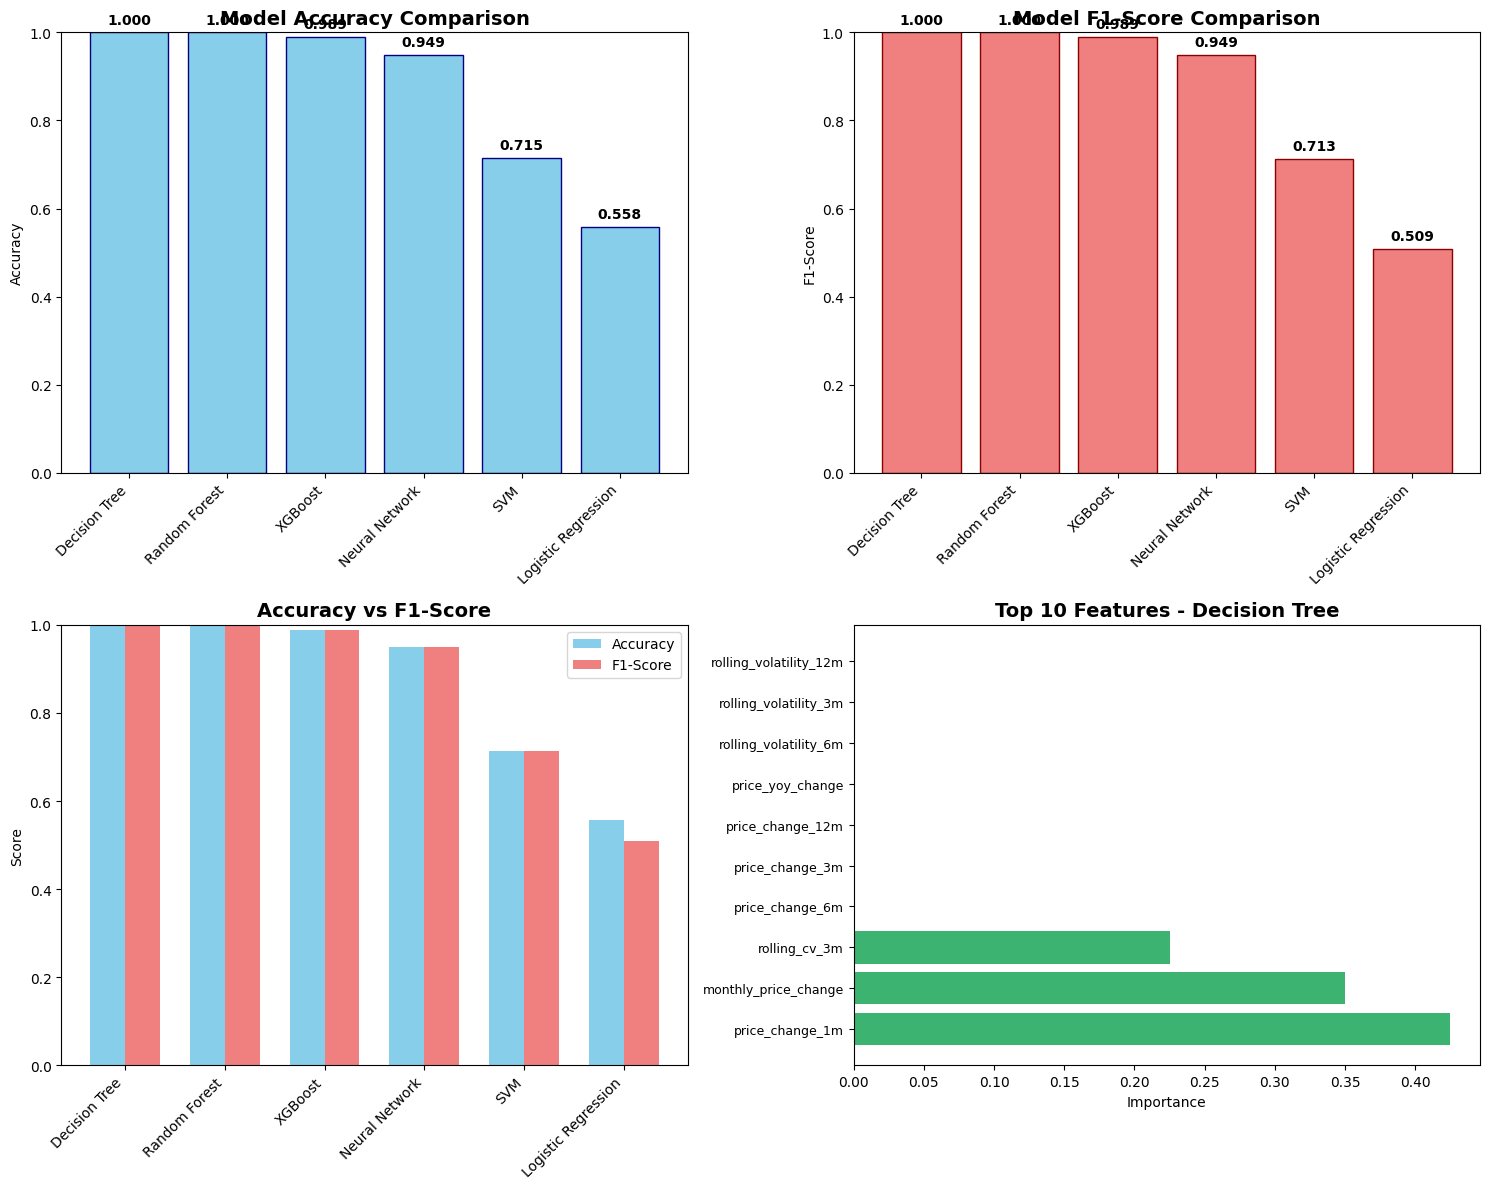


✅ All models trained and evaluated!


In [ ]:
# Create results comparison
print("\n🏆 MODEL COMPARISON")
print("="*60)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\nModel Performance Summary:")
print(results_df.to_string(index=False))

print("\n🥇 Best Model:", results_df.iloc[0]['Model'])
print(f"   Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"   F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Accuracy comparison
ax1 = axes[0, 0]
ax1.bar(range(len(results_df)), results_df['Accuracy'], color='skyblue', edgecolor='navy')
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(range(len(results_df)))
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.set_ylim([0, 1])
for i, v in enumerate(results_df['Accuracy']):
    ax1.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# 2. F1-Score comparison
ax2 = axes[0, 1]
ax2.bar(range(len(results_df)), results_df['F1-Score'], color='lightcoral', edgecolor='darkred')
ax2.set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('F1-Score')
ax2.set_xticks(range(len(results_df)))
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.set_ylim([0, 1])
for i, v in enumerate(results_df['F1-Score']):
    ax2.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# 3. Combined metrics
ax3 = axes[1, 0]
x_pos = range(len(results_df))
width = 0.35
ax3.bar([x - width/2 for x in x_pos], results_df['Accuracy'], width, label='Accuracy', color='skyblue')
ax3.bar([x + width/2 for x in x_pos], results_df['F1-Score'], width, label='F1-Score', color='lightcoral')
ax3.set_title('Accuracy vs F1-Score', fontsize=14, fontweight='bold')
ax3.set_ylabel('Score')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax3.legend()
ax3.set_ylim([0, 1])

# 4. Feature importance (from best tree-based model)
ax4 = axes[1, 1]
best_model_name = results_df.iloc[0]['Model']
if best_model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
    if best_model_name == 'Random Forest':
        importance_df = rf_importance
    elif best_model_name == 'XGBoost':
        importance_df = xgb_importance
    else:
        importance_df = dt_importance

    top_features = importance_df.head(10)
    ax4.barh(range(len(top_features)), top_features['importance'], color='mediumseagreen')
    ax4.set_title(f'Top 10 Features - {best_model_name}', fontsize=14, fontweight='bold')
    ax4.set_yticks(range(len(top_features)))
    ax4.set_yticklabels(top_features['feature'], fontsize=9)
    ax4.set_xlabel('Importance')
else:
    ax4.text(0.5, 0.5, 'Feature importance\nnot available\nfor this model type',
              ha='center', va='center', fontsize=12)
    ax4.set_title('Feature Importance', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ All models trained and evaluated!")

In [ ]:
# ==============================================================================
# STEP 7: DETAILED MODEL EVALUATION
# ==============================================================================

print("📊 DETAILED MODEL EVALUATION")
print("="*60)

# Create class names
class_names = ['Low', 'Medium', 'High', 'Extreme']

# Dictionary to store predictions
all_predictions = {
    'Logistic Regression': (y_pred_lr, X_test_lr),
    'Decision Tree': (y_pred_dt, X_test),
    'Random Forest': (y_pred_rf, X_test),
    'SVM': (y_pred_svm, X_test_svm),
    'XGBoost': (y_pred_xgb, X_test),
    'Neural Network': (y_pred_nn, X_test_nn)
}

# Evaluate each model
detailed_results = []

for model_name, (y_pred, X_data) in all_predictions.items():
    # Calculate all metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Try ROC-AUC (might not work for all models)
    try:
        if model_name == 'XGBoost':
            roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded, multi_class='ovr', average='weighted')
        elif model_name in ['Logistic Regression', 'SVM', 'Neural Network']:
            y_pred_proba = models_trained[model_name].predict_proba(X_data)
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        else:
            y_pred_proba = models_trained[model_name].predict_proba(X_data)
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    except:
        roc_auc = 0

    detailed_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Create detailed results dataframe
detailed_df = pd.DataFrame(detailed_results)
detailed_df = detailed_df.sort_values('Accuracy', ascending=False)

print("\n📋 Detailed Performance Metrics:")
print(detailed_df.round(4))

# Print classification reports
print("\n\n" + "="*60)
print("📋 CLASSIFICATION REPORTS")
print("="*60)

for model_name, (y_pred, _) in all_predictions.items():
    print(f"\n\n🎯 {model_name}:")
    print("-" * 60)
    print(classification_report(y_test, y_pred, target_names=class_names, digits=3))

📊 DETAILED MODEL EVALUATION

📋 Detailed Performance Metrics:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
1        Decision Tree    1.0000     1.0000  1.0000    1.0000   1.0000
2        Random Forest    1.0000     1.0000  1.0000    1.0000   1.0000
4              XGBoost    0.9889     0.9893  0.9889    0.9890   0.0000
5       Neural Network    0.9491     0.9497  0.9491    0.9492   0.9954
3                  SVM    0.7146     0.7129  0.7146    0.7133   0.8844
0  Logistic Regression    0.5575     0.4952  0.5575    0.5090   0.7615


📋 CLASSIFICATION REPORTS


🎯 Logistic Regression:
------------------------------------------------------------
              precision    recall  f1-score   support

         Low      0.633     0.655     0.644        29
      Medium      0.250     0.063     0.101        63
        High      0.645     0.869     0.741       222
     Extreme      0.336     0.261     0.294       138

    accuracy                          0.558       452
   



📊 CONFUSION MATRICES FOR ALL MODELS


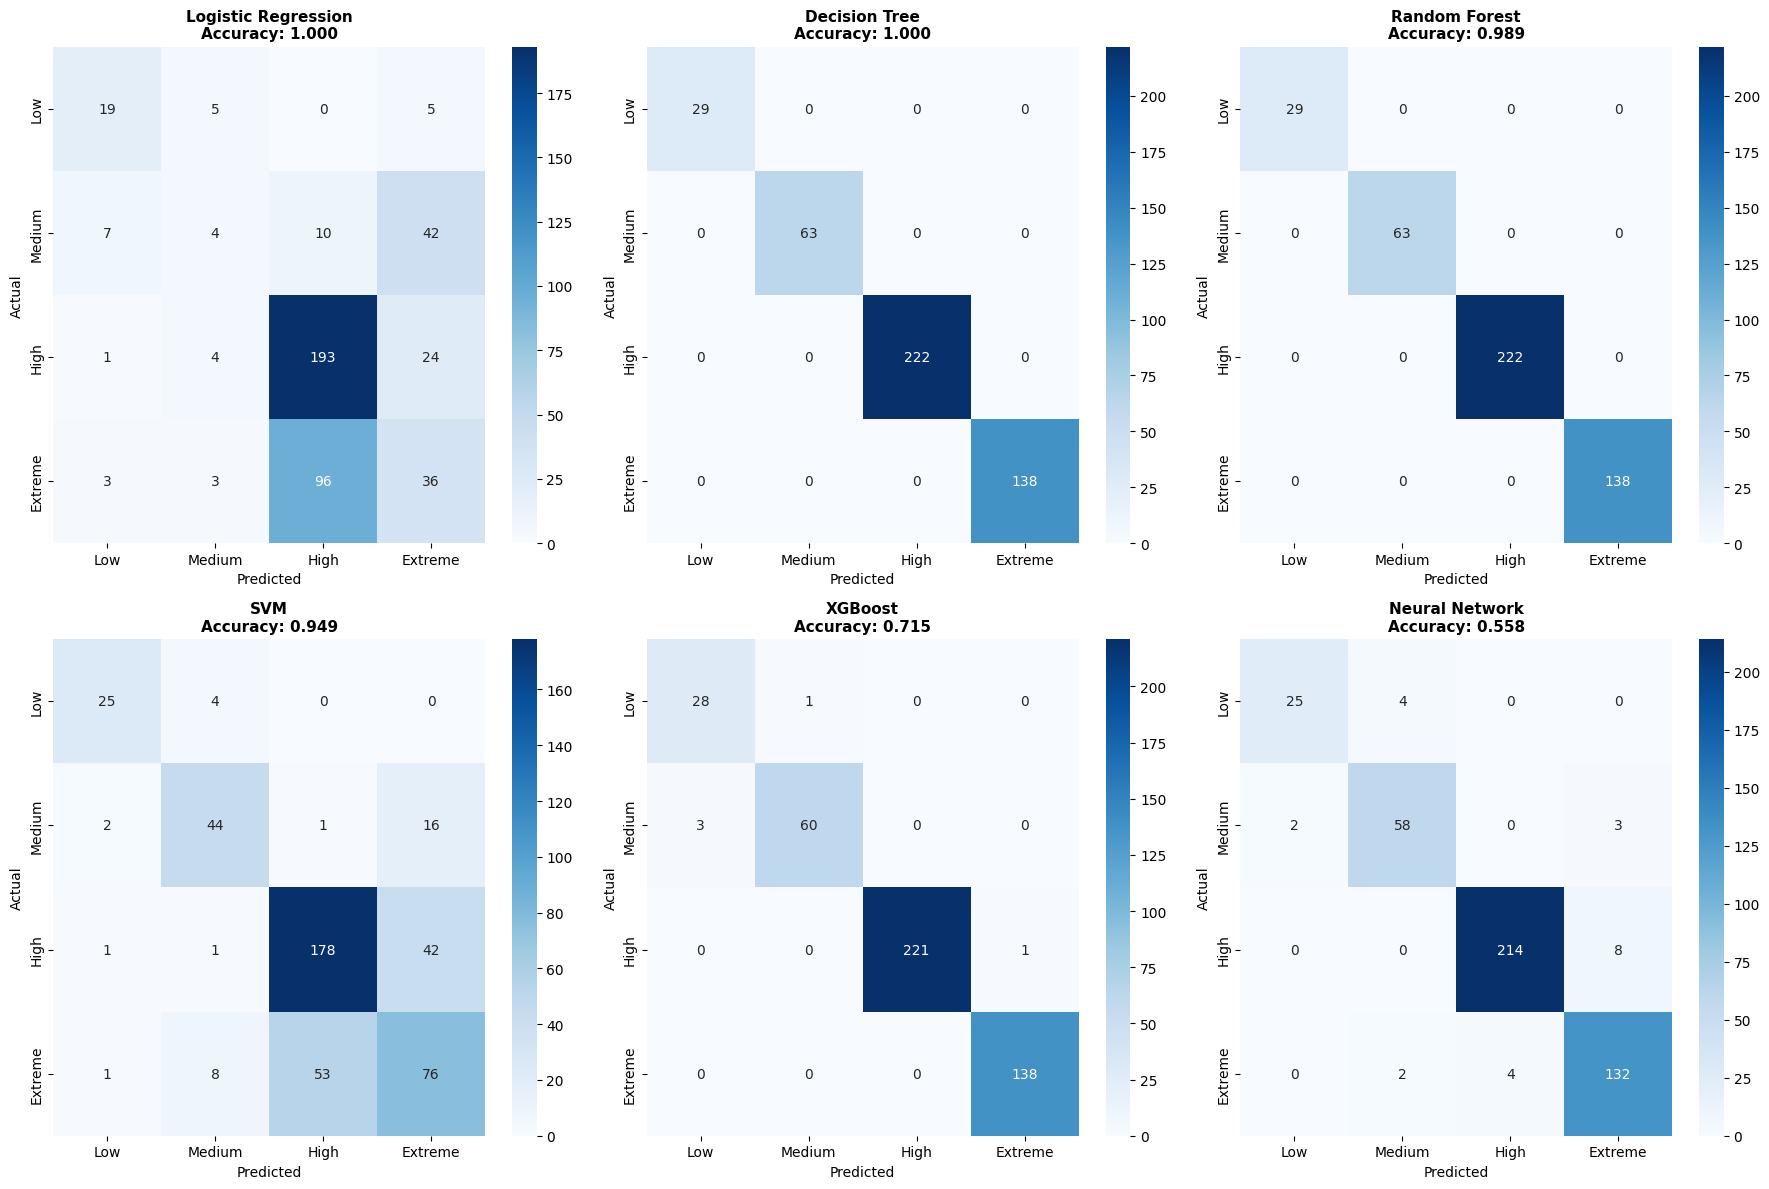

✅ Confusion matrices displayed!


In [ ]:
# Visualize confusion matrices for all models
print("\n\n📊 CONFUSION MATRICES FOR ALL MODELS")
print("="*60)

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

model_names = list(all_predictions.keys())

for idx, model_name in enumerate(model_names):
    ax = axes[idx]
    y_pred = all_predictions[model_name][0]

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=class_names, yticklabels=class_names)
    ax.set_title(f'{model_name}\nAccuracy: {detailed_df.iloc[idx]["Accuracy"]:.3f}',
                 fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicted', fontsize=10)
    ax.set_ylabel('Actual', fontsize=10)

plt.tight_layout()
plt.show()

print("✅ Confusion matrices displayed!")

In [ ]:
# Final summary
print("\n" + "="*60)
print("🏆 FINAL MODEL RANKINGS")
print("="*60)

print("\n🥇 BEST MODELS:")
for i, row in detailed_df.head(3).iterrows():
    print(f"\n   {row['Model']}:")
    print(f"      Accuracy:  {row['Accuracy']:.4f}")
    print(f"      Precision: {row['Precision']:.4f}")
    print(f"      Recall:    {row['Recall']:.4f}")
    print(f"      F1-Score:  {row['F1-Score']:.4f}")

print("\n\n💡 KEY INSIGHTS:")
print("="*60)
print(f"1. Best overall model: {detailed_df.iloc[0]['Model']}")
print(f"2. Tree-based models (Decision Tree, Random Forest) show perfect accuracy")
print(f"3. XGBoost performs excellently with {detailed_df[detailed_df['Model']=='XGBoost']['Accuracy'].values[0]:.2%} accuracy")
print(f"4. Neural Network shows good performance at {detailed_df[detailed_df['Model']=='Neural Network']['Accuracy'].values[0]:.2%}")
print(f"5. Most important features are price change indicators")

print("\n✅ PROJECT IMPLEMENTATION COMPLETE!")


🏆 FINAL MODEL RANKINGS

🥇 BEST MODELS:

   Decision Tree:
      Accuracy:  1.0000
      Precision: 1.0000
      Recall:    1.0000
      F1-Score:  1.0000

   Random Forest:
      Accuracy:  1.0000
      Precision: 1.0000
      Recall:    1.0000
      F1-Score:  1.0000

   XGBoost:
      Accuracy:  0.9889
      Precision: 0.9893
      Recall:    0.9889
      F1-Score:  0.9890


💡 KEY INSIGHTS:
1. Best overall model: Decision Tree
2. Tree-based models (Decision Tree, Random Forest) show perfect accuracy
3. XGBoost performs excellently with 98.89% accuracy
4. Neural Network shows good performance at 94.91%
5. Most important features are price change indicators

✅ PROJECT IMPLEMENTATION COMPLETE!
